In [266]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind

In [251]:
df = pd.read_csv("2024-02-26 Longitudinal Vaccine Responses - Hinojosa, Fox.csv")
df.sample(5)


,Dataset,Virus,Subject,Time,Age,Measurement
9254,Fox_HaNam,H3N2 A/Victoria/361/2011,H017/S02_Fox2022,Day7,58,160.
23231,Fox_HaNam,H3N2 A/Hanam/201/2009,H159/S02_Fox2022,Day4,46,20.
3489,Fox_HealthCareWorkers,H3N2 A/Bilthoven/21793/1972,RMH0072_Fox2022,Day0,55,320.
25147,Fox_HaNam,H3N2 A/Netherlands/301/1999,H192/S02_Fox2022,Day0,62,80.
2652,Fox_HealthCareWorkers,H3N2 A/Switzerland/9715293/2013_Egg,RMH0105_Fox2022,Day0,41,5.


In [103]:
young_ind_1 = df[df["Subject"] == "Subject01_VU+VI_BirthYear1998_Hinojosa2020"]
young_ind_1["Measurement"] = young_ind_1["Measurement"].str[:-1].astype(int)
young_ind_1

/var/folders/1t/_wnsh9955nb2ndd8b7xnp5k80000gn/T/ipykernel_22620/2623567685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  young_ind_1["Measurement"] = young_ind_1["Measurement"].str[:-1].astype(int)


,Dataset,Virus,Subject,Time,Age,Measurement
0,Hinojosa_V2014-2015,H3N2 A/Aichi/2/1968,Subject01_VU+VI_BirthYear1998_Hinojosa2020,Day0,16,10
1,Hinojosa_V2014-2015,H3N2 A/Victoria/3/1975,Subject01_VU+VI_BirthYear1998_Hinojosa2020,Day0,16,10
2,Hinojosa_V2014-2015,H3N2 A/Bangkok/1/1979,Subject01_VU+VI_BirthYear1998_Hinojosa2020,Day0,16,10
3,Hinojosa_V2014-2015,H3N2 A/Shanghai/11/1987,Subject01_VU+VI_BirthYear1998_Hinojosa2020,Day0,16,10
4,Hinojosa_V2014-2015,H3N2 A/Beijing/353/1989,Subject01_VU+VI_BirthYear1998_Hinojosa2020,Day0,16,10
...,...,...,...,...,...,...
59,Hinojosa_V2014-2015,H3N2 A/Wisconsin/67/2005,Subject01_VU+VI_BirthYear1998_Hinojosa2020,Day393,16,2560
60,Hinojosa_V2014-2015,H3N2 A/Brisbane/10/2007,Subject01_VU+VI_BirthYear1998_Hinojosa2020,Day393,16,2560
61,Hinojosa_V2014-2015,H3N2 A/Perth/16/2009,Subject01_VU+VI_BirthYear1998_Hinojosa2020,Day393,16,2560
62,Hinojosa_V2014-2015,H3N2 A/Texas/50/2012,Subject01_VU+VI_BirthYear1998_Hinojosa2020,Day393,16,2560


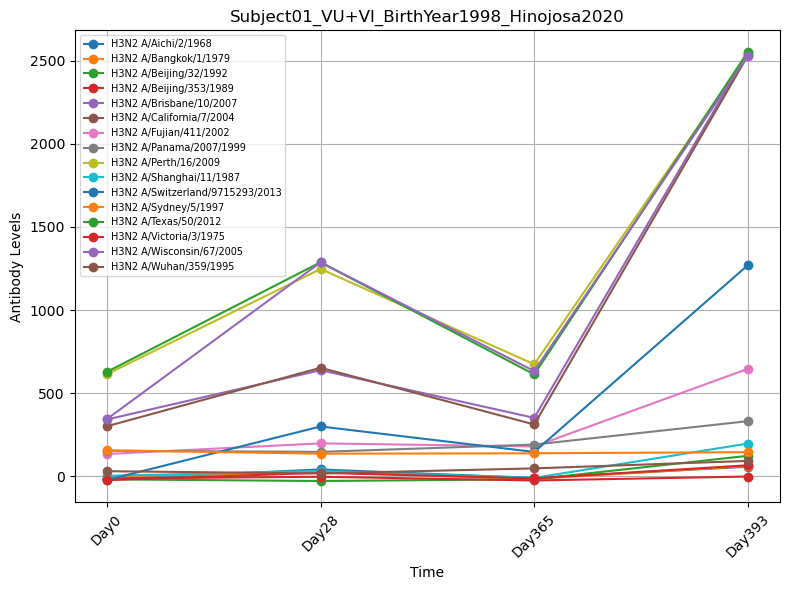

In [114]:

jitter = 40


plt.figure(figsize=(8, 6))

# Iterate over unique virus strains
for virus_type, group_data in young_ind_1.groupby('Virus'):
    y_jittered = group_data['Measurement'] + np.random.uniform(-jitter, jitter, size=len(group_data))
    plt.plot(group_data['Time'], y_jittered, marker='o', linestyle='-', label=virus_type)
    
plt.title('Subject01_VU+VI_BirthYear1998_Hinojosa2020')
plt.xlabel('Time')
plt.ylabel('Antibody Levels')
plt.legend(fontsize=7)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [147]:
var_across_id = df[df["Subject"].isin(["Subject01_VU+VI_BirthYear1998_Hinojosa2020", 
                                       "Subject11_VU+VI_BirthYear2002_Hinojosa2020", 
                                       "Subject23_VU+VI_BirthYear2004_Hinojosa2020"])]

var_across_id = var_across_id[var_across_id["Time"] == "Day28"]
var_across_id = var_across_id[["Virus", "Subject", "Measurement"]]
pt = var_across_id.pivot_table(index="Virus", columns="Subject", values="Measurement", aggfunc=sum)
pt.sort_values(by=["Subject01_VU+VI_BirthYear1998_Hinojosa2020", "Subject11_VU+VI_BirthYear2002_Hinojosa2020", "Subject23_VU+VI_BirthYear2004_Hinojosa2020"],inplace=True,ascending=False) 
pt.rename(columns={"Subject01_VU+VI_BirthYear1998_Hinojosa2020": "Subject 1 Antibodies",
                   "Subject11_VU+VI_BirthYear2002_Hinojosa2020": "Subject 11 Antibodies",
                   "Subject23_VU+VI_BirthYear2004_Hinojosa2020": "Subject 23 Antibodies"
                  })



Subject,Subject 1 Antibodies,Subject 11 Antibodies,Subject 23 Antibodies
Virus,,,
H3N2 A/Brisbane/10/2007,640.,640.,320.
H3N2 A/California/7/2004,640.,320.,640.
H3N2 A/Switzerland/9715293/2013,320.,2560.,160.
H3N2 A/Fujian/411/2002,160.,320.,160.
H3N2 A/Panama/2007/1999,160.,320.,160.
H3N2 A/Sydney/5/1997,160.,160.,160.
H3N2 A/Wisconsin/67/2005,1280.,640.,640.
H3N2 A/Texas/50/2012,1280.,2560.,640.
H3N2 A/Perth/16/2009,1280.,2560.,320.


In [264]:
Fox_df = df[df["Dataset"] == "Fox_HealthCareWorkers"]

#Drop rows with no antibody measurements, convert to int
Fox_df = Fox_df[Fox_df["Measurement"] != "-"]
Fox_df["Measurement"] = Fox_df["Measurement"].str[:-1]
Fox_df["Measurement"] = Fox_df["Measurement"].astype(int)

In [257]:
mean_age = Fox_df["Age"].mean()
std = Fox_df["Age"].std()
print(mean_age)
print(std)

39.85105173393974
11.545037618195497


In [258]:
def categorize(age):
    if age > (mean_age + std):
        return ">50"
    if age < (mean_age - std):
        return "<28"
    return None

Fox_df["Categorize"] = Fox_df["Age"].apply(categorize)
Fox_df.dropna(subset="Categorize", inplace=True)
Fox_df["Categorize"].value_counts()

<28    1296
>50     972
Name: Categorize, dtype: int64

In [259]:
averaged_across_variants = Fox_df.groupby(["Subject", "Time", "Categorize"]).agg({"Measurement": "mean"}).reset_index()


averaged_across_variants["Time"] = averaged_across_variants["Time"].str[3:].astype(int)
averaged_across_variants.sample(20)

,Subject,Time,Categorize,Measurement
33,RMH0117_Fox2022,0,<28,114.166667
42,RMH0145_Fox2022,0,>50,84.722222
58,RMH0190_Fox2022,21,>50,115.000000
48,RMH0150_Fox2022,0,<28,624.166667
2,RMH0005_Fox2022,224,<28,47.083333
1,RMH0005_Fox2022,21,<28,55.138889
14,RMH0069_Fox2022,224,<28,25.138889
23,RMH0082_Fox2022,224,<28,127.361111
34,RMH0117_Fox2022,21,<28,177.222222
54,RMH0179_Fox2022,0,>50,32.361111


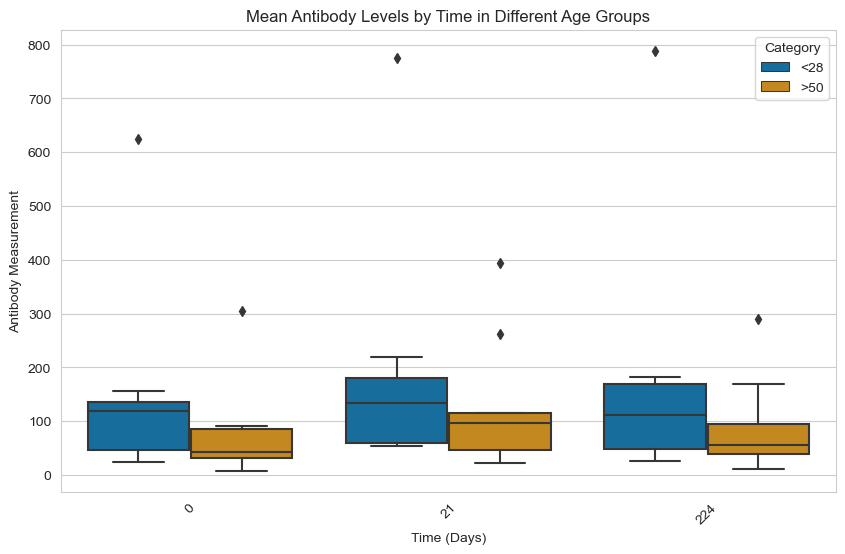

In [265]:
sns.set_style("whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Time', y='Measurement', hue='Categorize', data=averaged_across_variants, palette='colorblind')

# Add title and labels
plt.title('Mean Antibody Levels by Time in Different Age Groups')
plt.xlabel('Time (Days)')
plt.ylabel('Antibody Measurement')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Category')

# Show the plot
plt.show()

In [273]:
under_28_day0 = averaged_across_variants[(averaged_across_variants["Categorize"] == "<28") & (averaged_across_variants["Time"] == 0)]
over_28_day0 = averaged_across_variants[(averaged_across_variants["Categorize"] == ">50") & (averaged_across_variants["Time"] == 0)]

t_statistic, p_value = ttest_ind(under_28_day0["Measurement"], over_28_day0["Measurement"])
print(t_statistic)
print(p_value)

0.934463921016847
0.36178980873774114
